<a href="https://colab.research.google.com/github/Witney-C/qm2group18/blob/main/SHC_Regression_Analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Please save a copy of this in your own google drive before making changes.**
## **'File' then 'save a copy in drive'. Thanks!!**

# Step 1: Make data file and import data as an excel '.csv' file.

In [1]:
#this creates a file you can see by clicking on the file icon on left of google colab

!mkdir data
!mkdir plots

#import your excel csv into this file, by clicking three verticle dots and then 'upload'
#or import from github, etc.

#The data file must be two columns of numbers, the x values and y values.
#X-values are Independent variables, therefore our factors such as religiosity, GDP, election results
#Y-values are Dependent variables, therefore clinic distribution

#Use the interquartile range test from QM last year/boxplot to see if there are any outliers, remove if you like
#Make sure data is clean and has no NaN/blank spaces

# Step 2: Read imported csv file as a pandas DataFrame and save this as an object

In [9]:
import pandas as pd

#replace red file name by clicking three vertical dots next to your uploaded csv file on the left, then 'copy path'
#paste over red file name

data = pd.read_csv("/content/data/religious_adherence.csv")

#rename the column headers to 'x-values' and 'y-values'. 
#This hopefully makes sure this code can be used with a different csv file each time
#replace 'vaccine cover' and 'infant mortality' with the original column headers of your chosen dataset

df = data.rename(columns={'vaccine cover', 'infant mortality': 'y-values'})

#check the data looks ok, and how many columns there are, and the data type etc. (should be int/float)
#check that the column headers are now 'x-values' and 'y-values'

df.head()

,x-values,y-values
0,676.88,3.36
1,531.74,3.77
2,549.99,3.39
3,498.80,8.03
4,651.62,3.10


The following code is for removing outliers, only use if you need it

In [22]:
import numpy as np

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#apply to either x-values or y-values as required
lowerbound,upperbound = outlier_treatment(df['y-values'])

df[(df['y-values'] < lowerbound) | (df['y-values'] > upperbound)]

df.drop(df[ (df['y-values'] > upperbound) | (df['y-values'] < lowerbound) ].index,inplace=True)

df

,x-values,y-values
0,676.88,3.36
1,531.74,3.77
2,549.99,3.39
3,498.80,8.03
4,651.62,3.10
...,...,...
3131,477.22,0.19
3132,260.36,0.00
3133,606.83,0.48
3134,471.82,0.45


# Step 3: Plot a histogram for both variables (i.e. x column and y column).

This is to check for the distribution type. 
Some correlation statistical tests, e.g. Pearson (the main one??) assumes a normal/Gaussian/bell-curve distribution, but data will probably not fall under this. 

Therefore our correlation hypothesis test will be Spearman's rank test, which is less sensitive to outliers and does not assume normal distribution.

Plotting the histograms will justify this decision in our methodology.

In [11]:
#First, note down summary descriptive statistics of x and y values (mean, standard dev., median, etc.)
#also note down what x-values and y-values means, so we can write it in our website more meaningfully

#uncomment next line if 'count' i.e. number of datapoints in x/y do not match, to remove these values
#df.dropna(inplace=True)

df.describe()

,x-values,y-values
count,3106.000000,3106.000000
mean,508.140753,9.504192
std,170.389372,76.445784
min,30.650000,0.000000
25%,383.662500,0.930000
50%,495.120000,2.620000
75%,620.632500,5.510000
max,1000.000000,2803.330000


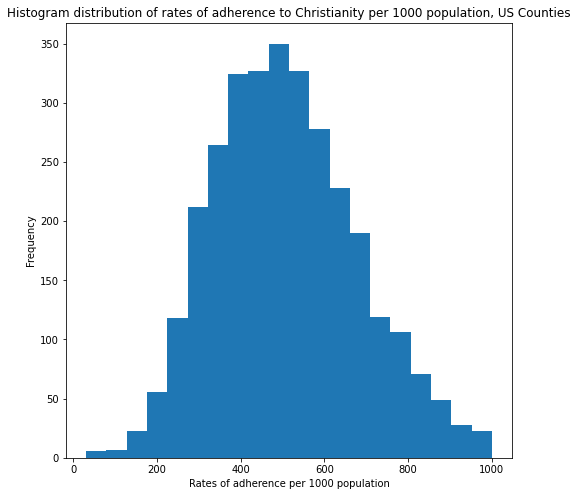

In [12]:
import matplotlib.pyplot as plt

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 8,8
plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines (remove the #) to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

#plot the histogram, repeat this for both the x-values and y-values
#customise histogram title and x axis label according to the data

plt.hist(df['x-values'],bins=20)
plt.title('Histogram distribution of rates of adherence to Christianity per 1000 population, US Counties')
plt.xlabel('Rates of adherence per 1000 population')
plt.ylabel('Frequency')

#save the image in your data file to the left
#change the filename to whatever you want (after the plots/ bit). But make sure it's a png.
output_filename_x = '/content/plots/religion_histogram_x.png'
plt.savefig(output_filename_x)

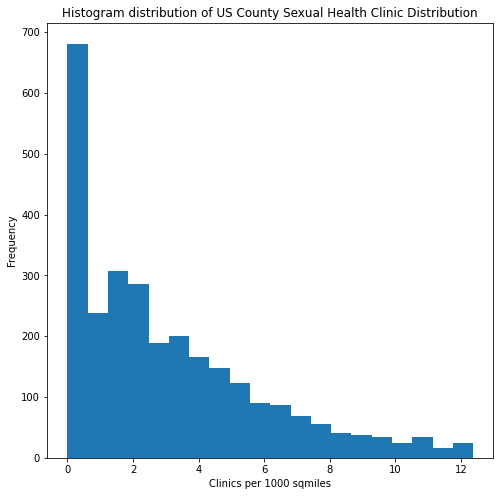

In [23]:
#same thing for y-values!

figure_width, figure_height = 8,8
plt.figure(figsize=(figure_width,figure_height))

#x_min,x_max = 0,500
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

plt.hist(df['y-values'],bins=20)
plt.title('Histogram distribution of US County Sexual Health Clinic Distribution')
plt.xlabel('Clinics per 1000 sqmiles')
plt.ylabel('Frequency')

output_filename_y = '/content/plots/clinicdensity_histogram_y.png'
plt.savefig(output_filename_y)

# Step 4: Save histograms as a .png.

Click on the vertical three dots next to the saved histogram plots and click 'download'. Will save to your computer.

Need to download asap because the whole thing is reset in google colab after you end each runtime.

# Step 5: Plot the scatter graph with line of best fit and equation

Plot a scatter graph, with a line of best fit and information on the line equation (gradient, intercept, etc.)

There is also a regression test of the r-squared value, or 'coefficient of determination', explaining how well of a fit a linear regression model is for the data, and what percentage of variation in the y-values can be explained by x-values. Ranges from 0-1.

> E.g. if R-squared is 0.32, it is closer to 0 than 1. This implies that a linear regression line may not be the best fit for the data. It also suggests that approximately 32% of variation in 'y' can be explained by 'x'. It is likely that several other factors also may be related to 'y'.

However it assumes normal distribution and is sensitive to outliers so we will need to do the Spearman's rank test as well.
Spearman's rank is good because it does NOT assume the data is a linear pattern while R-Squared does.

                            OLS Regression Results                            
Dep. Variable:               y-values   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     157.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           3.38e-35
Time:                        13:23:19   Log-Likelihood:                -6993.8
No. Observations:                2853   AIC:                         1.399e+04
Df Residuals:                    2851   BIC:                         1.400e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9869      0.163     30.598      0.0

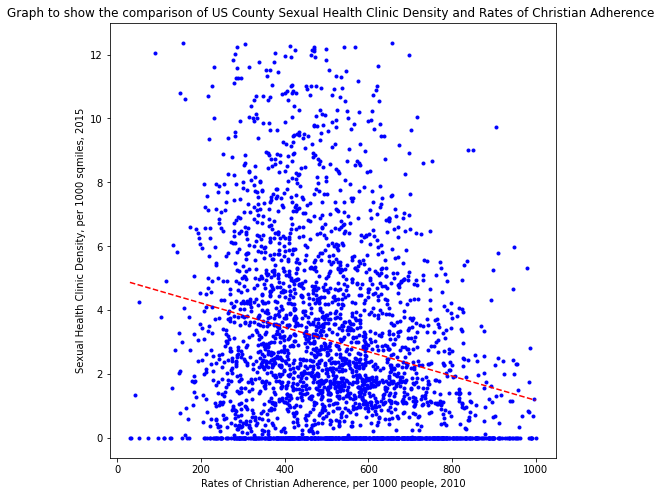

In [24]:
import statsmodels.api as sms
import numpy as np

# These lines extract the y-values and the x-values from the data:

x_values = df['x-values']
y_values = df['y-values']

# These lines perform the regression procedure:

X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:

gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:

print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines (remove the #) to set the axis limits (otherwise they will be set automatically):
#sometimes worth to fiddle with because if x_min isn't 0, the y axis is not drawn at x=0 
#might mean intercept looks like it doesn't match with the drawn plot
#x_min,x_max = 0,100
#y_min,y_max = 0,100
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
#Modify the title and axis labels to whatever you want. Include as much info as possible e.g. country and date
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Graph to show the comparison of US County Sexual Health Clinic Density and Rates of Christian Adherence ')
plt.xlabel('Rates of Christian Adherence, per 1000 people, 2010')
plt.ylabel('Sexual Health Clinic Density, per 1000 sqmiles, 2015')

#Save the graph in the data file on the left

plot_filename = '/content/plots/religion_scatterplot.png'
plt.savefig(plot_filename)

#print the equation of the regression line
print('Regression Line Equation: y=',gradient,'x+(',intercept,')')

# Step 6: Save scatter plot as .png

Download the scatterplot png using three vertical dots on the left.

Make a note of the line equation, and 'clean' it up i.e by changing values to 2.d.p./3.s.f. 


> E.g. example output of 'Regression Line Equation: y= -0.6148696202279116 x+( 71.00870489069794 )' can be cleaned up as **'Equation: y= -0.61x + 71.01'**

You can also interpret the equation in a real world context
> e.g. For every factor 10 x increases, the y value decreases (because negative gradient) by approximately 6.1 times.



# Step 7: Perform spearman's rank correlation test

 Spearman's rank correlation coefficient is good because it does not assume a linear relationship, and is stronger against outliers than other tests. This is because it compares data ranks than the pure numbers, so this is the statistical test we will use for our regression analysis.

In [25]:
#the test will give a matrix, i.e. correlation of each factor against each factor. 
#We just need the value for x against y, so note this down
df.corr(method='spearman')

,x-values,y-values
x-values,1.000000,-0.233083
y-values,-0.233083,1.000000


# Step 8: Record statistical value (Ρ/Spearman's rho) in a table with the values of the other factors

Note down the spearman's rank coefficient and for which factor it is for in relation to clinic access.

Interpret the coefficient, and give it a real world context.
The value can be between +1 and -1. +1 Indicates a perfect positive association of ranks, -1 a perfect negative association/correlation, and 0 indicates no association. The closer to 0, the weaker the association.

# Step 9: Spearman's hypothesis test

This is to test whether the realtionship/correlation found using the spearman test is a significant result.

(Even if results aren't significant, it's always worth still reporting them than 'hiding' them, so we can still put them on our website!)

Note down the results so we can report them.

## Hypothesis test:

> Significance level 5%

> Null hypothesis (H0): Correlation is insignificant

> Alternate hypothesis (H1): Correlation is significant

Failure to reject null hypothesis if p>0.05.

In [31]:
#here's the code that will provide the p value (it will also give us the already calculated rho value)

from scipy.stats import spearmanr

coef, p = spearmanr(x_values, y_values)

#rho/correlation coefficient, check the same as previously

print('Spearmans correlation coefficient: %.3f' % coef)
print('The p-value to test:',p)

#hypothesis test with p-value

alpha = 0.05
if p > alpha:
	print('Results are insignificant (fail to reject H0) p=%.10f' % p)
else:
	print('Results are significant (reject H0) p=%.10f' % p)

Spearmans correlation coefficient: -0.233
The p-value to test: 1.6694249101260368e-36
Results are significant (reject H0) p=0.0000000000
